Collatz basic notebook

In [17]:
"""
This notebook analyses basic attributes of collatz sequences and visualises them. 
The script produces a random collatz sequence for a predefined factor k and 
a max amount of iterations. 
"""

# Imports
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from collatz import generator as gen
from collatz import commons as com

# Configuration
MAX_VALUE = 101
K_FACTOR = 5
MAX_ITERATIONS = 300
ODDS_ONLY = False

START_VALUE = rnd.randint(1, MAX_VALUE)
START_VALUE = 19

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Create a collatz sequence and analyse it
analysis_frame = gen.generate_collatz_sequence(
    start_value=START_VALUE, k=K_FACTOR, max_iterations=MAX_ITERATIONS)

next_frame = com.analyse_collatz_basic_attributes(analysis_frame["next_collatz"])
analysis_frame["next_log2"] = next_frame["log2"]
analysis_frame["n_log2_fraction"] = next_frame["log2_fraction"]
analysis_frame["fraction_diff"] = \
    analysis_frame["log2_fraction"] - analysis_frame["n_log2_fraction"]

analysis_frame["mod_k"] = analysis_frame["collatz"] % K_FACTOR 
analysis_frame["mod_4"] = analysis_frame["collatz"] % 4 

analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)
analysis_frame["bin_len"] = analysis_frame["log2"] % 1

start_value = analysis_frame["collatz"][0]

# Show only odd numbers
if ODDS_ONLY:
    analysis_frame = analysis_frame[analysis_frame["odd"] == 1]

# Print data
print("Start value:", start_value, " K:", K_FACTOR, "\n")
print(analysis_frame[["collatz", "log2", "log2_fraction", 
                      "n_log2_fraction", "bin_str", "mod_4"]])

Start value: 19  K: 5 

    collatz      log2  log2_fraction  n_log2_fraction  bin_str  mod_4
0        19  4.247928       0.247928         0.584963    10011      3
1        96  6.584963       0.584963         0.584963  1100000      0
2        48  5.584963       0.584963         0.584963   110000      0
3        24  4.584963       0.584963         0.584963    11000      0
4        12  3.584963       0.584963         0.584963     1100      0
5         6  2.584963       0.584963         0.584963      110      2
6         3  1.584963       0.584963         0.000000       11      3
7        16  4.000000       0.000000         0.000000    10000      0
8         8  3.000000       0.000000         0.000000     1000      0
9         4  2.000000       0.000000         0.000000      100      0
10        2  1.000000       0.000000         0.000000       10      2
11        1  0.000000       0.000000         0.584963        1      1


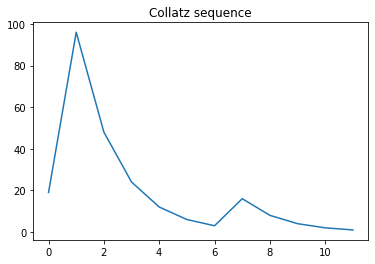

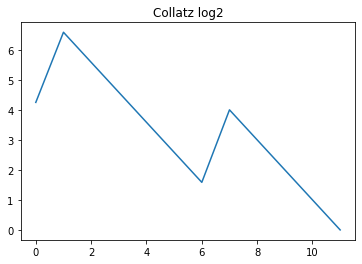

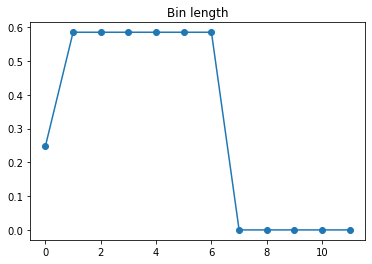

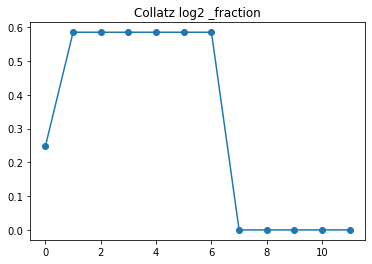

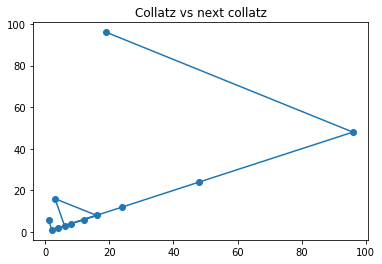

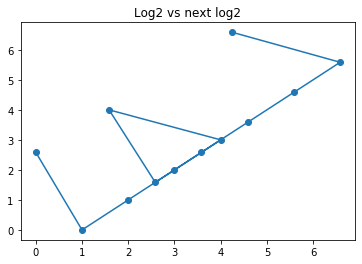

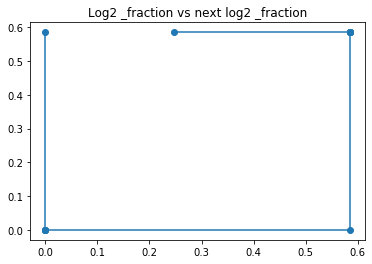

In [18]:
#Plot results
# Collatz
plt.figure()
plt.title("Collatz sequence")
plt.plot(analysis_frame["collatz"])

# log2
plt.figure()
plt.title("Collatz log2")
plt.plot(analysis_frame["log2"])

# bin length
plt.figure()
plt.title("Bin length")
plt.plot(analysis_frame["bin_len"], "o-")

# log2 _fraction
plt.figure()
plt.title("Collatz log2 _fraction")
plt.plot(analysis_frame["log2_fraction"], "o-")

# collatz vs next collatz
plt.figure()
plt.title("Collatz vs next collatz")
plt.plot(analysis_frame["collatz"], analysis_frame["next_collatz"], "o-")

# log2 vs next log2
plt.figure()
plt.title("Log2 vs next log2")
plt.plot(analysis_frame["log2"], analysis_frame["next_log2"], "o-")

# log _fraction vs next log _fraction
plt.figure()
plt.title("Log2 _fraction vs next log2 _fraction")
plt.plot(analysis_frame["log2_fraction"], analysis_frame["n_log2_fraction"], "o-")
